# WeatherPy by Paola VDW

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [53]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [54]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 573


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [55]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    units = "metric"
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
  
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    
    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        city_weather_json = city_weather.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather_json['coord']['lat']
        city_lng = city_weather_json['coord']['lon']
        city_max_temp = city_weather_json['main']['temp_max']
        city_humidity = city_weather_json['main']['humidity']
        city_clouds = city_weather_json['clouds']['all']
        city_wind = city_weather_json['wind']['speed']
        city_country = city_weather_json['sys']['country']
        city_date = city_weather_json['dt']#[''] #add "dt" for date?

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grytviken
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | invercargill
Processing Record 4 of Set 1 | mount gambier
Processing Record 5 of Set 1 | tazovsky
Processing Record 6 of Set 1 | pakokku
Processing Record 7 of Set 1 | west island
Processing Record 8 of Set 1 | araioses
Processing Record 9 of Set 1 | jamestown
Processing Record 10 of Set 1 | ancud
Processing Record 11 of Set 1 | vorkuta
Processing Record 12 of Set 1 | aasiaat
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | tiksi
Processing Record 15 of Set 1 | olonkinbyen
Processing Record 16 of Set 1 | port mathurin
Processing Record 17 of Set 1 | malvan
Processing Record 18 of Set 1 | hamilton
Processing Record 19 of Set 1 | sitka
Processing Record 20 of Set 1 | petropavlovsk-kamchatsky
Processing Record 21 of Set 1 | talnakh
Processing Record 22 of Set 1 | albany
Processing Record 

In [56]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          542
Lat           542
Lng           542
Max Temp      542
Humidity      542
Cloudiness    542
Wind Speed    542
Country       542
Date          542
dtype: int64

In [57]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,grytviken,-54.2811,-36.5092,1.01,99,100,1.94,GS,1719601961
1,port-aux-francais,-49.3500,70.2167,1.77,83,95,20.65,TF,1719601962
2,invercargill,-46.4000,168.3500,7.79,96,34,1.79,NZ,1719601962
3,mount gambier,-37.8333,140.7667,9.07,92,100,3.23,AU,1719601963
4,tazovsky,67.4667,78.7000,5.22,78,100,8.01,RU,1719601964


In [58]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [59]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,1.01,99,100,1.94,GS,1719601961
1,port-aux-francais,-49.3500,70.2167,1.77,83,95,20.65,TF,1719601962
2,invercargill,-46.4000,168.3500,7.79,96,34,1.79,NZ,1719601962
3,mount gambier,-37.8333,140.7667,9.07,92,100,3.23,AU,1719601963
4,tazovsky,67.4667,78.7000,5.22,78,100,8.01,RU,1719601964


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

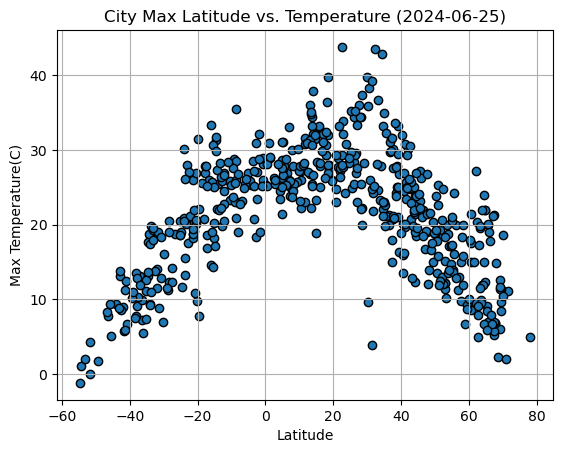

In [60]:
# Build scatter plot for latitude vs. temperature
latitude = city_data_df['Lat']
temperature = city_data_df['Max Temp']

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature(C)')
plt.title('City Max Latitude vs. Temperature (2024-06-25)')
plt.grid()
plt.scatter(latitude,temperature, edgecolors='black')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

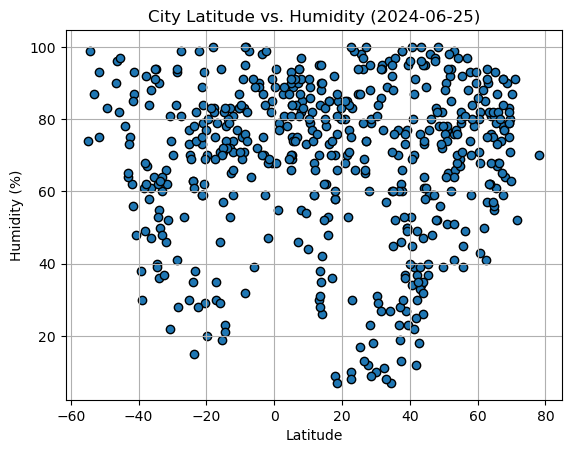

In [61]:
# Build the scatter plots for latitude vs. humidity
latitude = city_data_df['Lat']
humidity = city_data_df['Humidity']

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (2024-06-25)')
plt.grid()
plt.scatter(latitude,humidity, edgecolors='black')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

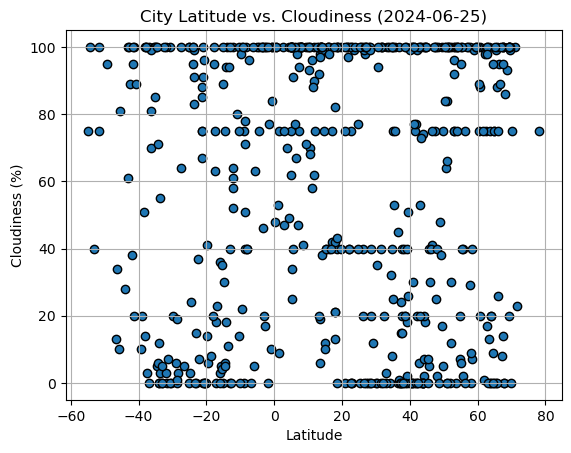

In [62]:
# Build the scatter plots for latitude vs. cloudiness
latitude = city_data_df['Lat']
cloudiness = city_data_df['Cloudiness']

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (2024-06-25)')
plt.grid()
plt.scatter(latitude,cloudiness, edgecolors='black')


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

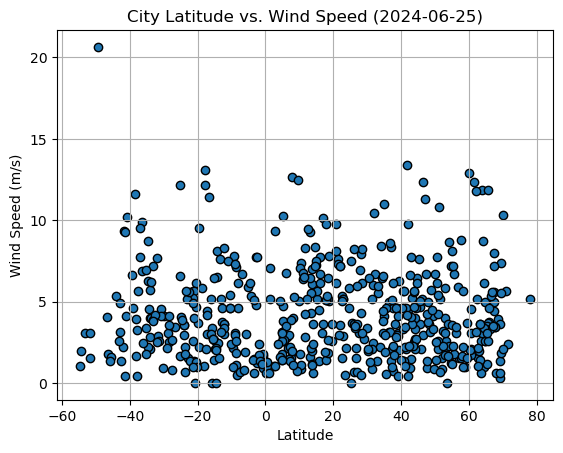

In [63]:
# Build the scatter plots for latitude vs. wind speed
latitude = city_data_df['Lat']
wind = city_data_df['Wind Speed']

#Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude vs. Wind Speed (2024-06-25)')
plt.grid()
plt.scatter(latitude,wind, edgecolors='black')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [64]:
# Define a function to create Linear Regression plots
from scipy import stats
def linear_regression_plot(x_value, y_value, hemisphere):
    slope, intercept, r_value, p_value, std_err = stats.linregress(x_value, y_value)
    line = slope * x_value + intercept

In [65]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df['Lat']>=0,:])

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,tazovsky,67.4667,78.7000,5.22,78,100,8.01,RU,1719601964
5,pakokku,21.3333,95.1000,28.88,70,100,7.63,MM,1719601855
8,jamestown,42.0970,-79.2353,25.77,49,0,4.47,US,1719601967
10,vorkuta,67.5000,64.0000,6.20,91,100,5.57,RU,1719601968
11,aasiaat,68.7098,-52.8699,2.34,90,93,3.93,GL,1719601969


In [66]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df['Lat']<0,:])

# Display sample data
southern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,1.01,99,100,1.94,GS,1719601961
1,port-aux-francais,-49.3500,70.2167,1.77,83,95,20.65,TF,1719601962
2,invercargill,-46.4000,168.3500,7.79,96,34,1.79,NZ,1719601962
3,mount gambier,-37.8333,140.7667,9.07,92,100,3.23,AU,1719601963
6,west island,-12.1568,96.8225,26.99,74,100,3.60,CC,1719601966


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.5011238400565593


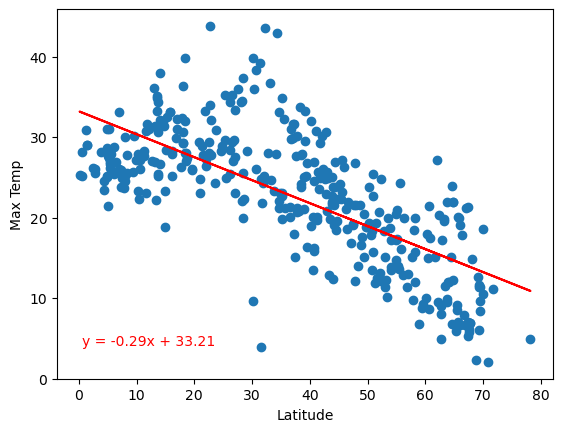

In [67]:
# Linear regression on Northern Hemisphere
x_value = northern_hemi_df['Lat']
y_value = northern_hemi_df['Max Temp']
hemisphere = 'Northern'
slope, intercept, r_value, p_value, std_err = stats.linregress(x_value, y_value)
line = slope * x_value + intercept

plt.scatter(x_value, y_value, color='tab:blue')
plt.plot(x_value, line, color='red')
linear_regression_plot

plt.xlabel('Latitude')
plt.ylabel('Max Temp')

plt.annotate(f'y = {slope:.2f}x + {intercept:.2f}', xy=(0.05, .09), xycoords='axes fraction', color='red')

print(f"The r-value is: {r_value**2}")  
plt.show()

The r-value is: 0.6880611750449501


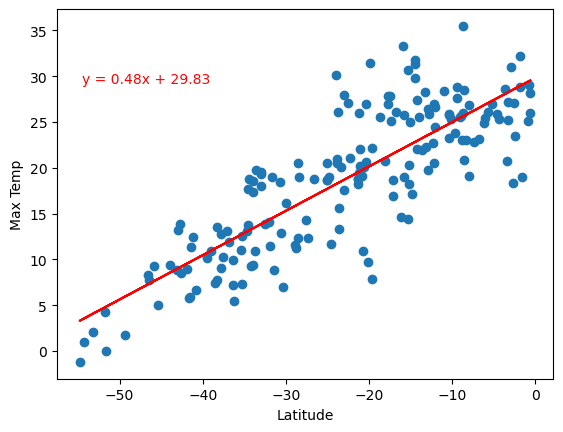

In [68]:
# Linear regression on Southern Hemisphere
x_value = southern_hemi_df['Lat']
y_value = southern_hemi_df['Max Temp']
hemisphere = 'Southern'
slope, intercept, r_value, p_value, std_err = stats.linregress(x_value, y_value)
line = slope * x_value + intercept

plt.scatter(x_value, y_value, color='tab:blue')
plt.plot(x_value, line, color='red')
linear_regression_plot

plt.xlabel('Latitude')
plt.ylabel('Max Temp')

plt.annotate(f'y = {slope:.2f}x + {intercept:.2f}', xy=(0.05,.8), xycoords='axes fraction', color='red')
print(f"The r-value is: {r_value**2}")
plt.show()

**Discussion about the linear relationship:** 
The linear regression in the northern hemisphere shows a negative correlation. As the latitude increases, the temperature decreases. This happens because the latitude gets further away from the equator (imaginary line around the earth with higher sun exposure).
The linear regression in the southern hemisphere shows a positive correlation. As the latitude increases, the temperature increases. This happens because the latitude gets closer to the equator(imaginary line around the earth with higher sun exposure). The r-value is greater in the southern hemisphere compared to the northern hemisphere because it has a higher variance in temperature.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.00013744141335749144


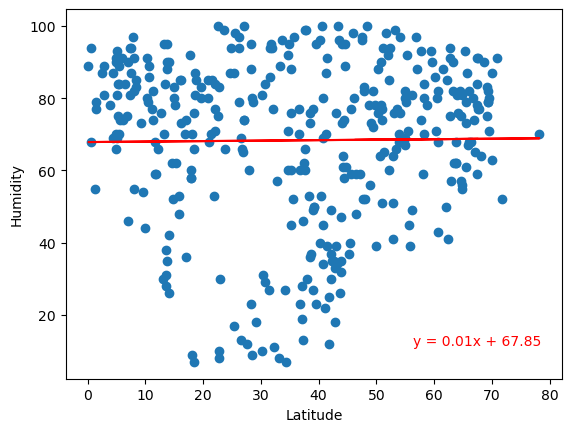

In [69]:
# Northern Hemisphere
x_value = northern_hemi_df['Lat']
y_value = northern_hemi_df['Humidity']
hemisphere = 'Northern'
slope, intercept, r_value, p_value, std_err = stats.linregress(x_value, y_value)
line = slope * x_value + intercept

plt.scatter(x_value, y_value, color='tab:blue')
plt.plot(x_value, line, color='red')
linear_regression_plot

plt.xlabel('Latitude')
plt.ylabel('Humidity')

plt.annotate(f'y = {slope:.2f}x + {intercept:.2f}', xy=(0.7, .09), xycoords='axes fraction', color='red')

print(f"The r-value is: {r_value**2}")
plt.show()

The r-value is: 0.005491342763416129


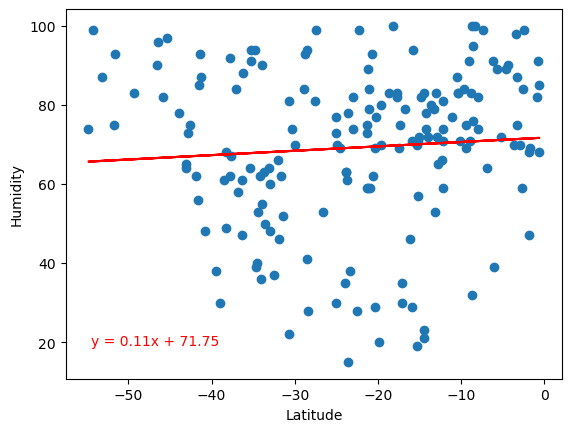

In [70]:
# Southern Hemisphere
x_value = southern_hemi_df['Lat']
y_value = southern_hemi_df['Humidity']
hemisphere = 'Southern'
slope, intercept, r_value, p_value, std_err = stats.linregress(x_value, y_value)
line = slope * x_value + intercept

plt.scatter(x_value, y_value, color='tab:blue')
plt.plot(x_value, line, color='red')
linear_regression_plot

plt.xlabel('Latitude')
plt.ylabel('Humidity')

plt.annotate(f'y = {slope:.2f}x + {intercept:.2f}', xy=(0.05,.09), xycoords='axes fraction', color='red')
print(f"The r-value is: {r_value**2}")
plt.show()

**Discussion about the linear relationship:** 
The linear regression in the northern hemisphere shows a very small positive correlation. As the latitude increases, the humidity increases as well but just by a tiny bit.  
The linear regression in the southern hemisphere shows a small positive correlation as well. As the latitude increases, the humidity increases. The r-value is greater in the southern hemisphere compared to the northern hemisphere because it has a higher variance (slope) in humidity. This might be an indicator that the northern hemisphere is more humid in comparision to the southern hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.019411767751632704


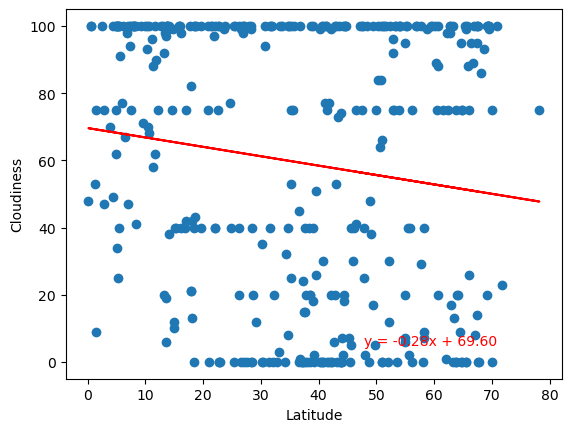

In [71]:
# Northern Hemisphere
x_value = northern_hemi_df['Lat']
y_value = northern_hemi_df['Cloudiness']
hemisphere = 'Northern'
slope, intercept, r_value, p_value, std_err = stats.linregress(x_value, y_value)
line = slope * x_value + intercept

plt.scatter(x_value, y_value, color='tab:blue')
plt.plot(x_value, line, color='red')
linear_regression_plot

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

plt.annotate(f'y = {slope:.2f}x + {intercept:.2f}', xy=(0.6, .09), xycoords='axes fraction', color='red')

print(f"The r-value is: {r_value**2}")  
plt.show()

The r-value is: 0.0005973306918951242


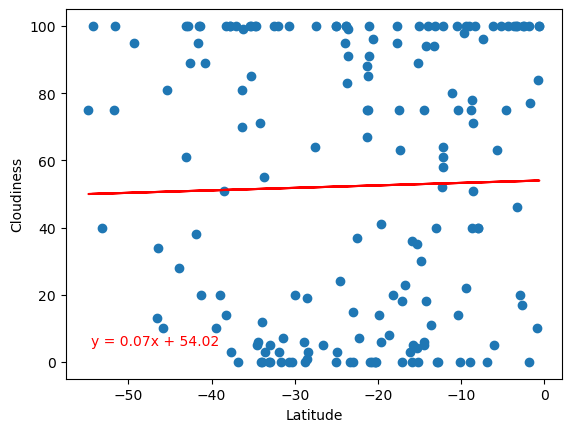

In [72]:
# Southern Hemisphere
x_value = southern_hemi_df['Lat']
y_value = southern_hemi_df['Cloudiness']
hemisphere = 'Southern'
slope, intercept, r_value, p_value, std_err = stats.linregress(x_value, y_value)
line = slope * x_value + intercept

plt.scatter(x_value, y_value, color='tab:blue')
plt.plot(x_value, line, color='red')
linear_regression_plot

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

plt.annotate(f'y = {slope:.2f}x + {intercept:.2f}', xy=(0.05,.09), xycoords='axes fraction', color='red')
print(f"The r-value is: {r_value**2}")
plt.show()

**Discussion about the linear relationship:** 
The linear regression in the northern hemisphere shows a negative correlation. As the latitude increases, the cloudiness decreases. The linear regression in the southern hemisphere shows a positive correlation. As the latitude increases, the cloudiness increases as well. The r-value in the southern hemisphere is lower thatn the northern hemisphere which may indicate that there is little variance in the cloudiness when it comes to latitude. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0003397729250055364


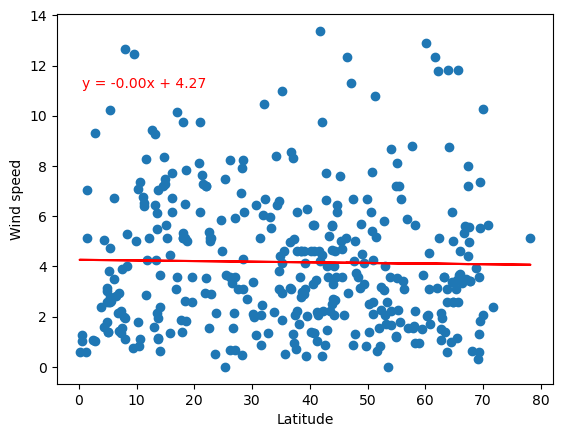

In [73]:
# Northern Hemisphere
x_value = northern_hemi_df['Lat']
y_value = northern_hemi_df['Wind Speed']
hemisphere = 'Northern'
slope, intercept, r_value, p_value, std_err = stats.linregress(x_value, y_value)
line = slope * x_value + intercept

plt.scatter(x_value, y_value, color='tab:blue')
plt.plot(x_value, line, color='red')
linear_regression_plot

plt.xlabel('Latitude')
plt.ylabel('Wind speed')

plt.annotate(f'y = {slope:.2f}x + {intercept:.2f}', xy=(0.05,.8), xycoords='axes fraction', color='red')

print(f"The r-value is: {r_value**2}")  
plt.show()

The r-value is: 0.016398523889681046


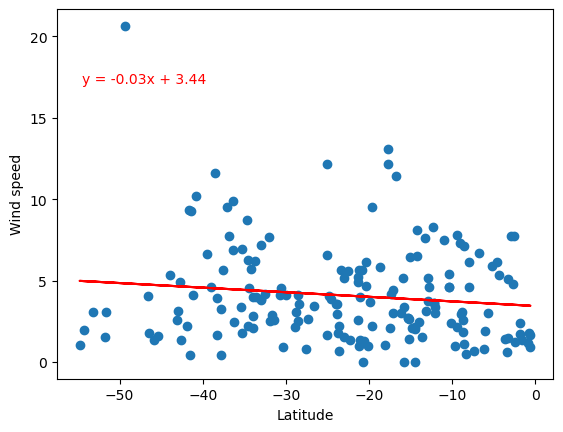

In [74]:
# Southern Hemisphere
x_value = southern_hemi_df['Lat']
y_value = southern_hemi_df['Wind Speed']
hemisphere = 'Southern'
slope, intercept, r_value, p_value, std_err = stats.linregress(x_value, y_value)
line = slope * x_value + intercept

plt.scatter(x_value, y_value, color='tab:blue')
plt.plot(x_value, line, color='red')
linear_regression_plot

plt.xlabel('Latitude')
plt.ylabel('Wind speed')

plt.annotate(f'y = {slope:.2f}x + {intercept:.2f}', xy=(0.05,.8), xycoords='axes fraction', color='red')
print(f"The r-value is: {r_value**2}")
plt.show()

**Discussion about the linear relationship:** 
The linear regression in both, the northern & southern hemispheres, show a negative correlation. As the latitude increases, the wind speed decreases. They both have a negative slope. The r-value in the northern hemisphere is much lower than the southern hemisphere which may indicate that there is little to no change in wind speed as the latitude increases.